<a href="https://colab.research.google.com/github/strumer69/House_price_advenced/blob/main/house_advance_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## پیش بینی قیمت خانه
#### این کد راه حلی برای سوال پیش بینی قیمت خانه ذکر شده در سایت کگل است. 

[لینک سوال در سایت کگل](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

#### کد نوشته شده به طور کامل در این [بلاگ پست ](https://shmoradpour.ir/2023/03/04/%d8%ad%d9%84-%d9%85%d8%b3%d8%a6%d9%84%d9%87-%d9%82%db%8c%d9%85%d8%aa-%d8%ae%d8%a7%d9%86%d9%87-%d8%a8%d9%87-%d8%b1%d9%88%d8%b4-%d8%af%db%8c%da%af%d8%b1/)توضیح داده شده است.

In [3]:
# فراخوانی کتابخانه های مورد نیاز
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRFRegressor 
from sklearn.feature_selection import RFE 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 


In [4]:
# دیتاست های مورد نیاز که علاوه بر کگل در گیت هاب من نیز وجود دارند
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
Id = test['Id'] 

## EDA
نگاهی به وضعیت داده ها می اندازیم

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## HANDLING NULL VALUES
#### در این قسمت میخواهیم داده های از دست رفته را مدیریت کنیم

In [13]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
# ابتدا مقادیر ناموجود هر ستون را از زیاد به کم سورت میکنیم
pd.set_option('display.max_rows', train.shape[0])
pd.DataFrame(train.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [15]:
pd.set_option('display.max_rows', test.shape[0])
pd.DataFrame(test.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


In [16]:
# ستونهایی که مقدار داده های میس شده آنها بیشتر از 50 درصد باشد را حذف میکنیم
null = train.isnull().sum() / train.shape[0] *100   
col_to_drop = null[null > 50 ].keys()  
col_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [17]:
# تعداد ستونهایی که مقادیر صفر دارند نوزده تا هستند
len((train.columns[train.isnull().any()]))

19

In [18]:
train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True) 

In [19]:
# now we have 81-4=77 features
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
#for understanding
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

In [21]:
cols_with_null=train.columns[train.isnull().any()]
cols_with_null
#type(cols_with_null)

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [22]:
print(train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']])

      LotFrontage MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0    BrkFace       196.0       Gd       TA           No   
1            80.0       None         0.0       Gd       TA           Gd   
2            68.0    BrkFace       162.0       Gd       TA           Mn   
3            60.0       None         0.0       TA       Gd           No   
4            84.0    BrkFace       350.0       Gd       TA           Av   
...           ...        ...         ...      ...      ...          ...   
1455         62.0       None         0.0       Gd       TA           No   
1456         85.0      Stone       119.0       Gd       TA           No   
1457         66.0       None         0.0       TA       Gd           No   
1458         68.0       None         0.0       TA       TA           Mn   
1459         75.0       None         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ 

In [23]:
#train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True) 
# df_cols_with_null=train[[cols_with_null]]

In [24]:
print(train['MasVnrType'])
print(train['MasVnrType'].mode())

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object
0    None
dtype: object


In [25]:
print(train['BsmtQual'])
print(train['BsmtQual'].mode())

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object
0    TA
dtype: object


In [26]:
len((train.columns[train.isnull().any()]))

15

## REPLACE NULL **VALUES**
در کد زیر به سادگی مقادیر عددی و کتگوریکال را با مقادیر میانگیم و مد جایگذاری میکنیم

In [27]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea']  = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())     
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrType']   = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])  
train['BsmtQual']     = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])  
train['BsmtCond']     = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])  
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])  
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])  
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])  
train['Electrical']   = train['Electrical'].fillna(train['Electrical'].mode()[0])  
train['FireplaceQu']  = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])  
train['GarageType']   = train['GarageType'].fillna(train['GarageType'].mode()[0])  
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])  
train['GarageQual']   = train['GarageQual'].fillna(train['GarageQual'].mode()[0])  
train['GarageCond']   = train['GarageCond'].fillna(train['GarageCond'].mode()[0]) 

In [28]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [29]:
train.isnull().values.sum()

0

In [30]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## PLOTTING

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


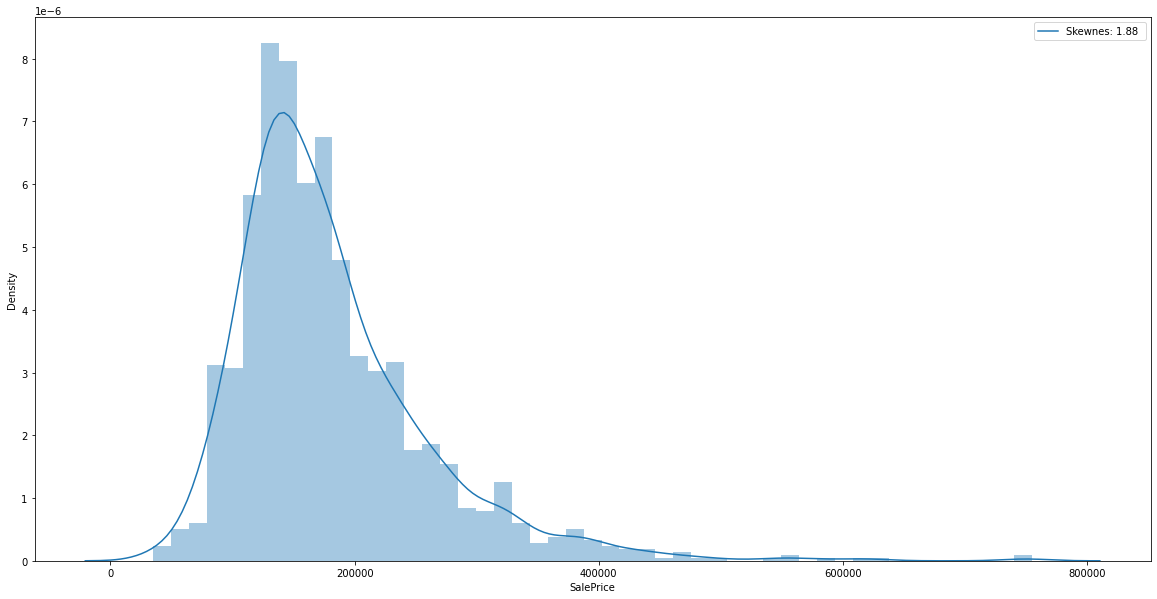

In [32]:
plt.figure(figsize=(20,10))
bar = sns.distplot(train['SalePrice'])
bar.legend(['Skewnes: {:.2f} '.format(train['SalePrice'].skew())])
plt.show()

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
corr = train.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.5] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object') 

No. of Highly Corrolated Features: 11


Text(105.0, 0.5, 'Features')

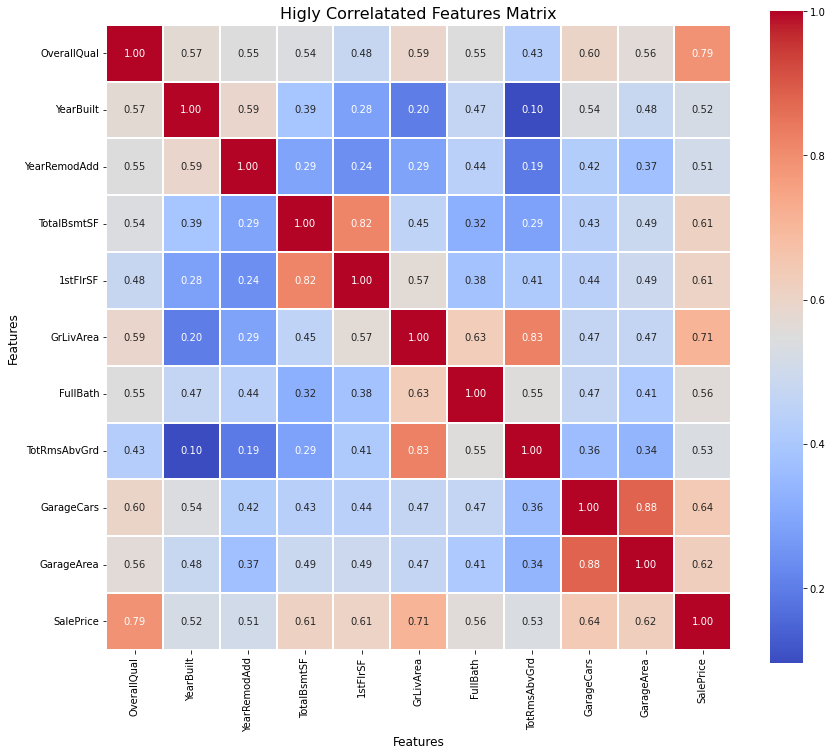

In [35]:
plt.figure(figsize=(14,12))   
sns.heatmap(train[high_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2)

plt.title('Higly Correlatated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)



```
# This is formatted as code
```

## FEATURE ENGINEERING

In [36]:
print(train.shape)
print(test.shape)
print(type(train),type(test))

(1460, 77)
(1459, 80)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [37]:
train = pd.get_dummies(train, drop_first=True)  
test = pd.get_dummies(test, drop_first=True)  
print(train.shape)
print(test.shape)
print(type(train),type(test))

(1460, 238)
(1459, 228)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [38]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [39]:
len(train.select_dtypes(include='object').columns)


0

In [40]:

len(test.select_dtypes(include='object').columns)

0

## SPLITTING DATASET

In [41]:
corr = train.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.52] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'ExterQual_TA'],
      dtype='object') 

No. of Highly Corrolated Features: 11


In [42]:
X = train[high_corr_features.drop('SalePrice')]      
y = train[['SalePrice']]  
print(type(X), type(y))
print(len(X.columns),len(y.columns))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
10 1


In [43]:
len(test.columns)

228

In [44]:
test = test[high_corr_features.drop('SalePrice')] 
len(test.columns)

10

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_val',X_val.shape)    #Printing the X_test Features Shape
print(f'y_val',y_val.shape)    #Printing the y_test Labels  Shape

X_train (1168, 10)
y_train (1168, 1)
X_val (292, 10)
y_val (292, 1)


In [47]:
test.shape

(1459, 10)

In [48]:
test.mode()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA
0,5,2005,0.0,864,864,2,6,2.0,0.0,1


In [49]:
test.mode().iloc[0]

OverallQual        5.0
YearBuilt       2005.0
TotalBsmtSF        0.0
1stFlrSF         864.0
GrLivArea        864.0
FullBath           2.0
TotRmsAbvGrd       6.0
GarageCars         2.0
GarageArea         0.0
ExterQual_TA       1.0
Name: 0, dtype: float64

In [50]:
test.fillna(test.mode().iloc[0], inplace=True) 


In [51]:
test.shape

(1459, 10)

In [52]:
# normalise data
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_val = ss.transform(X_val) # to be suitable for model
test = ss.transform(test)   # to be suitable for model

In [53]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_val',X_val.shape)    #Printing the X_test Features Shape
print(f'y_val',y_val.shape)    #Printing the y_test Labels  Shape

X_train (1168, 10)
y_train (1168, 1)
X_val (292, 10)
y_val (292, 1)


## BUILDNG MODEL

## RANDOM FOREST

In [54]:
# Model Building
clf_rfr = RandomForestRegressor(random_state=0)   #Creating the Random Forest Regressor Model
clf_rfr.fit(X_train, y_train)                     #Training the Model with X_train & y_train
pred = clf_rfr.predict(X_val)                    #Predicting the X_test 

#Testing the model accuracy with different paramtes
r2   = r2_score(y_val, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_val, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_val, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error


#Defining a DataFrame 
rfr_results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

result =rfr_results.append(rfr_results, ignore_index=True)
#Printing the Model Results with different Metrics
result

<ipython-input-54-73cddea9ac9f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfr.fit(X_train, y_train)                     #Training the Model with X_train & y_train


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,0.851189,19459.953152,1.027663e+09,32057.183087
1,Random Forest Regressor,0.851189,19459.953152,1.027663e+09,32057.183087


## PREDICTION AND SUBMISSION

In [55]:
output = clf_rfr.predict(test)                   


In [56]:
output.shape

(1459,)

In [57]:
output

array([119529.99, 148225.5 , 163587.6 , ..., 135155.37, 106777.  ,
       231731.41])

In [58]:
type(output)

numpy.ndarray

In [59]:
df=pd.DataFrame({"Id":Id.values,"SalePrice":output})


In [60]:
df.to_csv('final_house_price.csv', index=False)